# Stock Market Prediction Model using LSTM

Stock market prediction using TensorFlow is a technique that involves using machine learning algorithms to analyze historical data and predict future trends in the stock market. Using TensorFlow, I build a complex neural networks that analyzes large amounts of data to make accurate predictions. The model is trained using historical data, and then used to make predictions about future trends in the stock market.

**Importing Python Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

**Reading the stock input from the user and downloading the data from yahoo finance using the yfinance python library**

In [2]:
ticker = input('Enter Stock Ticker: ')

Enter Stock Ticker: ^NSEI


In [3]:
import yfinance as yf

In [4]:
df = yf.download(tickers=ticker,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


**Performing Exploratory Data Analysis**

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-05,10228.450195,10331.799805,10227.450195,10325.150391,10325.150391,236800
2018-04-06,10322.750000,10350.450195,10290.849609,10331.599609,10331.599609,200200
2018-04-09,10333.700195,10397.700195,10328.500000,10379.349609,10379.349609,221600
2018-04-10,10412.900391,10424.849609,10381.500000,10402.250000,10402.250000,251700
2018-04-11,10428.150391,10428.150391,10355.599609,10417.150391,10417.150391,250400


In [6]:
df = df.reset_index()['Close']

In [7]:
df

0       10325.150391
1       10331.599609
2       10379.349609
3       10402.250000
4       10417.150391
            ...     
1229    16951.699219
1230    17080.699219
1231    17359.750000
1232    17398.050781
1233    17557.050781
Name: Close, Length: 1234, dtype: float64

In [8]:
df.shape

(1234,)

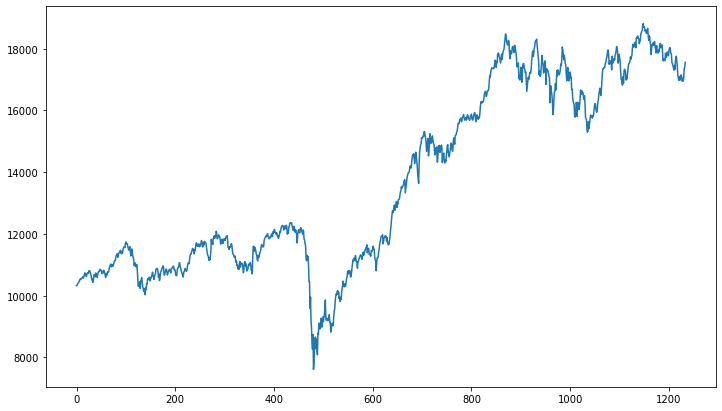

In [9]:
plt.figure(figsize=(12,7))
plt.plot(df)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [12]:
df1 = scaler.fit_transform(df.values.reshape(-1,1))

In [13]:
df1.shape

(1234, 1)

In [14]:
training_size = int(len(df1) * 0.7)
test_size = len(df1) - training_size

In [15]:
training_data, testing_data = df1[0:training_size,:], df1[training_size:len(df1), :]

**Function to create training data aand testing data**

In [16]:
def create_dataset(dataset, timestamp):
    dataX, dataY = [], []
    
    for i in range(len(dataset)-timestamp-1):
        a = dataset[i:(i+timestamp), 0]
        dataX.append(a)
        dataY.append(dataset[i+timestamp, 0])
        
    return np.array(dataX), np.array(dataY)

In [17]:
timestamp = 100

In [18]:
X_train, y_train = create_dataset(training_data,timestamp)

In [19]:
X_test, y_test = create_dataset(testing_data, timestamp)

In [20]:
X_train

array([[0.24235313, 0.24292884, 0.24719138, ..., 0.35461626, 0.35232651,
        0.36436432],
       [0.24292884, 0.24719138, 0.24923564, ..., 0.35232651, 0.36436432,
        0.36851972],
       [0.24719138, 0.24923564, 0.25056577, ..., 0.36436432, 0.36851972,
        0.36435987],
       ...,
       [0.65452026, 0.64634337, 0.63257381, ..., 0.90502797, 0.90169839,
        0.89338306],
       [0.64634337, 0.63257381, 0.63090449, ..., 0.90169839, 0.89338306,
        0.88569714],
       [0.63257381, 0.63090449, 0.65280639, ..., 0.89338306, 0.88569714,
        0.8999085 ]])

In [21]:
y_train

array([0.36851972, 0.36435987, 0.36301188, 0.36334219, 0.35458052,
       0.34904147, 0.34517175, 0.35052337, 0.35518308, 0.34170364,
       0.32825995, 0.33561565, 0.34858624, 0.33631637, 0.32749228,
       0.32351533, 0.31536965, 0.29968537, 0.30861659, 0.30739805,
       0.30059138, 0.2963869 , 0.30333637, 0.28994175, 0.2668214 ,
       0.24157649, 0.24439731, 0.24020173, 0.25439975, 0.2342744 ,
       0.25550671, 0.25907742, 0.26552701, 0.25377043, 0.2404249 ,
       0.2352206 , 0.22643217, 0.23339061, 0.22447726, 0.21600571,
       0.23572047, 0.23103844, 0.24783857, 0.24728962, 0.26269276,
       0.260104  , 0.2606396 , 0.26674555, 0.2655672 , 0.25637262,
       0.26532616, 0.26477268, 0.26837914, 0.27422618, 0.28147474,
       0.27190522, 0.26689279, 0.26034948, 0.26944137, 0.27452964,
       0.27839047, 0.28998194, 0.29159321, 0.29221808, 0.29094602,
       0.28321546, 0.26699104, 0.27525276, 0.25693054, 0.26234912,
       0.27917156, 0.28398757, 0.28522843, 0.29262868, 0.29444

In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Using Tensorflow and LSTM to create our Machine Learning Model**

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import LSTM, Dense

In [25]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

2023-04-05 17:59:25.563982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Adding callbacks inorder to prevent overfitting**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs = 100, batch_size = 64, callbacks=[early_stop])

Epoch 1/100
12/12 [==============================] - 11s 470ms/step - loss: 0.0674 - val_loss: 0.0234
Epoch 2/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0102 - val_loss: 0.0034
Epoch 3/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0057 - val_loss: 0.0177
Epoch 4/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 5/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0017 - val_loss: 0.0070
Epoch 6/100
12/12 [==============================] - 4s 333ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 8/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 9/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 10/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0013 - val_l

12/12 [==============================] - 3s 259ms/step - loss: 5.1577e-04 - val_loss: 8.7982e-04
Epoch 79/100
12/12 [==============================] - 3s 277ms/step - loss: 4.7979e-04 - val_loss: 7.6114e-04
Epoch 80/100
12/12 [==============================] - 3s 243ms/step - loss: 5.3017e-04 - val_loss: 7.4533e-04
Epoch 81/100
12/12 [==============================] - 3s 275ms/step - loss: 5.1241e-04 - val_loss: 7.1226e-04
Epoch 82/100
12/12 [==============================] - 3s 239ms/step - loss: 4.8672e-04 - val_loss: 8.4062e-04
Epoch 83/100
12/12 [==============================] - 3s 269ms/step - loss: 4.6887e-04 - val_loss: 7.2997e-04
Epoch 84/100
12/12 [==============================] - 3s 298ms/step - loss: 4.9364e-04 - val_loss: 6.8961e-04
Epoch 85/100
12/12 [==============================] - 4s 323ms/step - loss: 4.6383e-04 - val_loss: 8.6121e-04
Epoch 86/100
12/12 [==============================] - 4s 362ms/step - loss: 4.5675e-04 - val_loss: 8.4542e-04
Epoch 87/100
12/12 [===

In [30]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 1s 147ms/step


In [31]:
train_predict = scaler.inverse_transform(train_predict)

In [32]:
test_predict = scaler.inverse_transform(test_predict)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mean_absolute_error(y_train, train_predict)

12292.196772488891

In [35]:
np.sqrt(mean_squared_error(y_train, train_predict))

12467.494072185502

In [36]:
mean_absolute_error(y_test, test_predict)

17422.78336706947

In [37]:
np.sqrt(mean_squared_error(y_test, test_predict))

17439.90126054438

In [38]:
df.describe()

count     1234.000000
mean     13700.863775
std       2983.663749
min       7610.250000
25%      11067.937744
50%      12181.424805
75%      16974.549805
max      18812.500000
Name: Close, dtype: float64

**Plotting the prediction for the next 30 days**

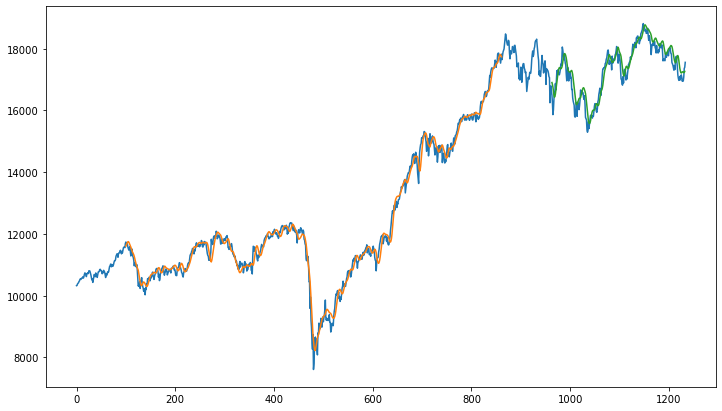

In [39]:
look_back=100

trainPredictPlot = np.empty_like(df1)

trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)

testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(12,7))
plt.plot(scaler.inverse_transform(df1) )

plt.plot(trainPredictPlot)

plt.plot(testPredictPlot)

plt.show()

In [40]:
len(testing_data)

371

In [44]:
X_input = testing_data[271:].reshape(-1,1)

In [45]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [46]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        #print(temp_input)
        
        X_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        
        #print(x_input)
        
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        
        #print(temp_input)
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
    

print(lst_output)

[0.87676734]
2
[0.87676734]
3
[0.87676734]
4
[0.87676734]
5
[0.87676734]
6
[0.87676734]
7
[0.87676734]
8
[0.87676734]
9
[0.87676734]
10
[0.87676734]
11
[0.87676734]
12
[0.87676734]
13
[0.87676734]
14
[0.87676734]
15
[0.87676734]
16
[0.87676734]
17
[0.87676734]
18
[0.87676734]
19
[0.87676734]
20
[0.87676734]
21
[0.87676734]
22
[0.87676734]
23
[0.87676734]
24
[0.87676734]
25
[0.87676734]
26
[0.87676734]
27
[0.87676734]
28
[0.87676734]
29
[0.87676734]
30
[0.87676734]
31
[[0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351], [0.8767673373222351],

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
len(df1)

1234

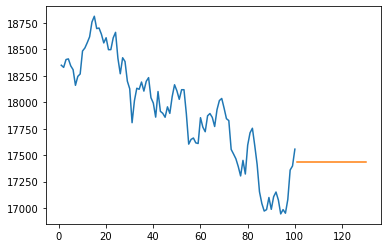

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

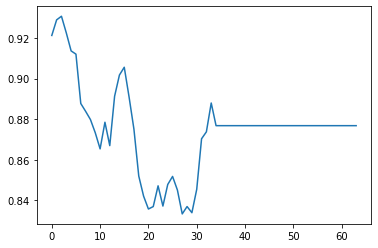

In [50]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [51]:
df3 = scaler.inverse_transform(df3).tolist()

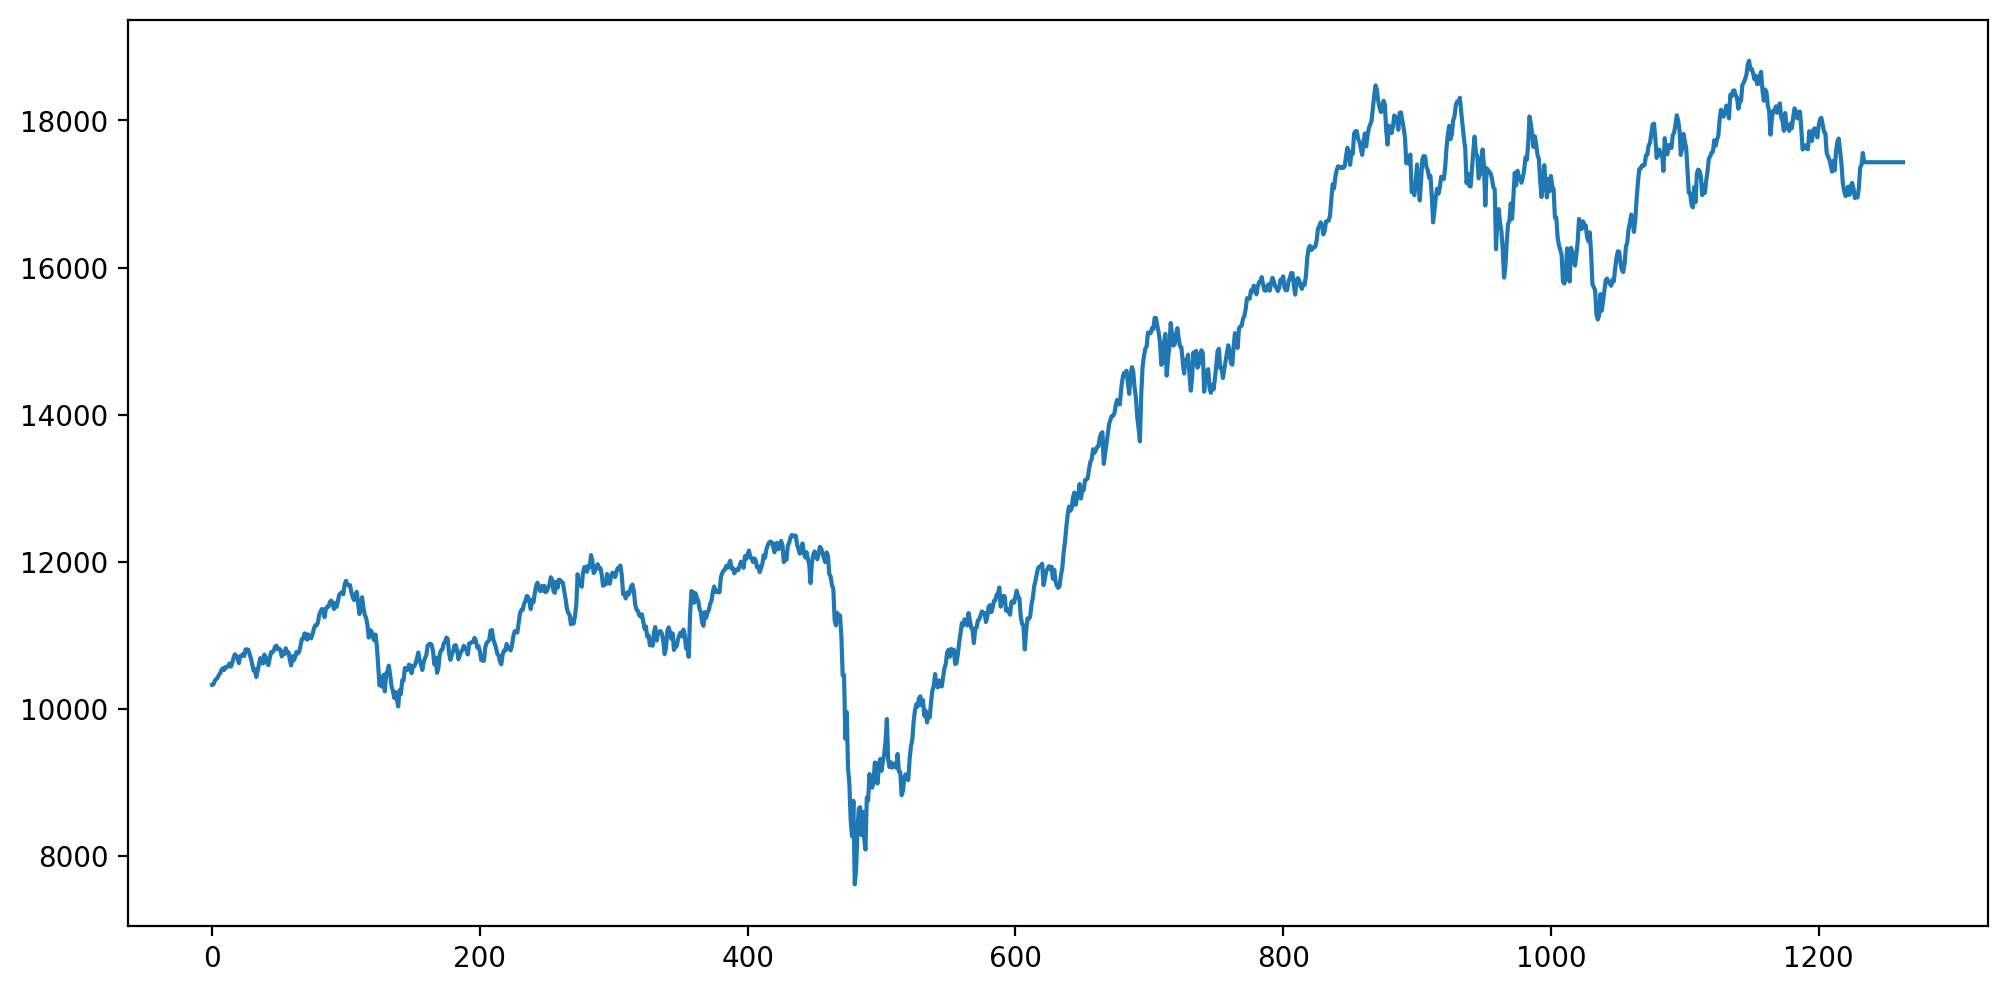

In [52]:
plt.figure(figsize=(12,6), dpi=200)
plt.plot(df3)